## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
# YOUR CODE HERE

#Sam: asked the learning assistant to clarify that:
#   .. is the folder above your current folder
#and . is your current folder


bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
# YOUR CODE HERE
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)


In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE

coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE

#Check how many missing values
bitstamp.isnull().sum()


Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
#drop all missing values
bitstamp = bitstamp.dropna()

In [8]:
#check any missing values again
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [9]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE

bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")


C:\Users\samch\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [10]:
#Confirm the dollar sign has been removed
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


In [11]:
#check the data type
bitstamp.dtypes


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [12]:
# Convert the Close data type to a float
# YOUR CODE HERE

bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")

In [13]:
#Confirm the Close col data type is float64 now
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [14]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE

#Review duplicated values
bitstamp.duplicated().sum()


0

In [15]:
#Drop duplicated values, even though here is no duplicated value
bitstamp = bitstamp.drop_duplicates()


In [16]:
#Check again for duplicated values
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [17]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE


#Step 1 for coinbase: drop any missing values

#Check how many missing values in coinbase
coinbase.isnull().sum()


Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [18]:
#drop all missing values in coinbase

coinbase = coinbase.dropna()

In [19]:
#check any missing values in coinbase again 
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [20]:
### Step 2: Use the `str.replace` function to remove the dollar signs ($) 
#from the values in the Close column in coinbase

coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")

C:\Users\samch\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [21]:
#Confirm the dollar sign has been removed in coinbase
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [22]:
#check the data type in coinbase
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [23]:
### Step 3: Convert the data type of the Close column to a `float` in coinbase

coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")


In [24]:
#Confirm the Close col data type is float64 now in coinbase
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [25]:
### Step 4: Review the data for duplicated values, and drop them if necessary in coinbase

#Review duplicated values
coinbase.duplicated().sum()

0

In [26]:
#Drop duplicated values, even though here is no duplicated value in coinbase
coinbase = coinbase.drop_duplicates()

In [27]:
#Check again for duplicated values
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [28]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced = bitstamp.loc[:, "Close"]

# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [29]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced = coinbase.loc[:, "Close"]

# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [30]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [31]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

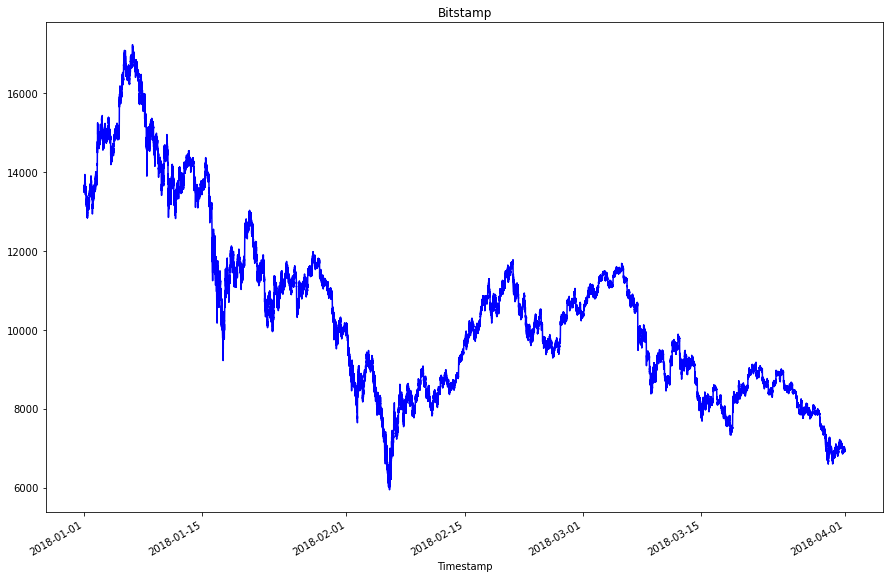

In [32]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp['Close'].plot(
    figsize=(15, 10), title="Bitstamp", color="blue", label="bitstamp")

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

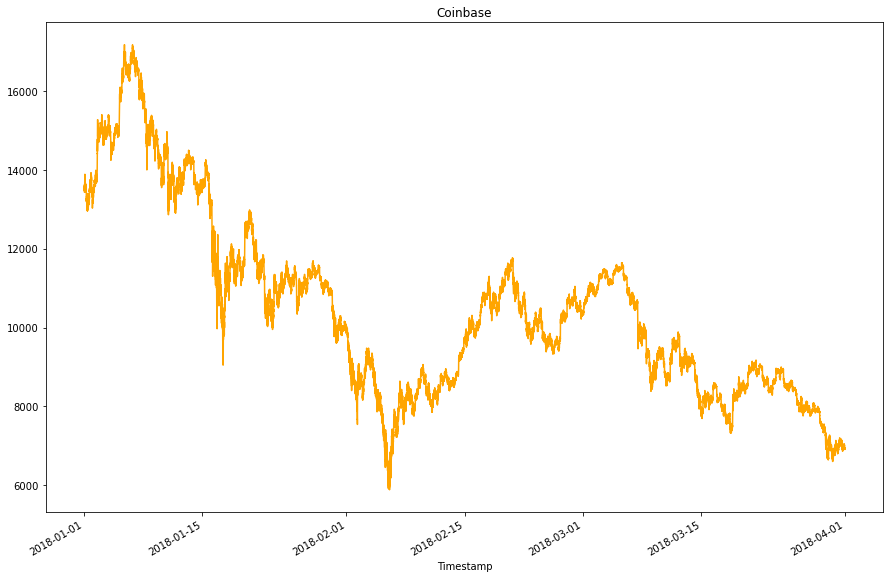

In [33]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase['Close'].plot(
    figsize=(15, 10), title="Coinbase", color="orange", label="coinbase")


<AxesSubplot:title={'center':'Bitstamp vs. Coinbase in The Full Lenth'}, xlabel='Timestamp'>

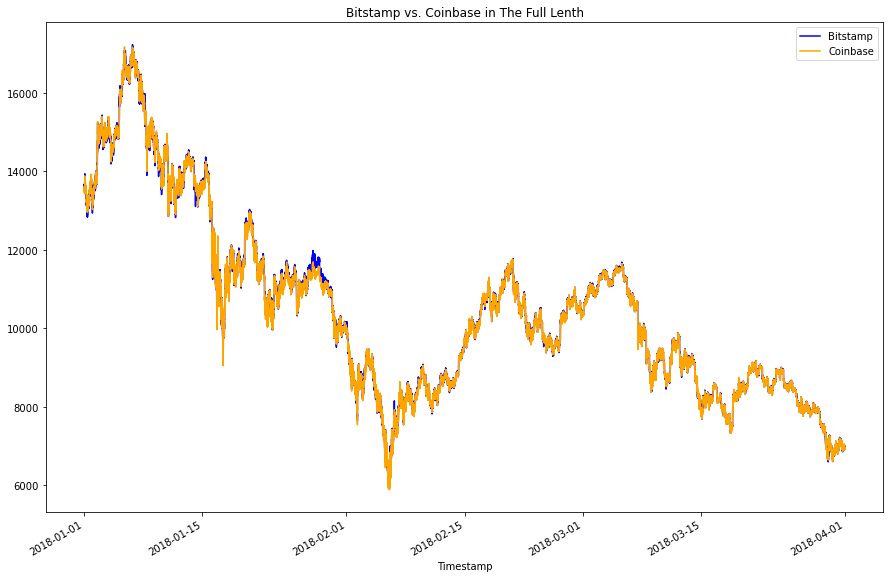

In [34]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

bitstamp['Close'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase in The Full Lenth", color="blue", label="Bitstamp")
coinbase['Close'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase in The Early Month'}, xlabel='Timestamp'>

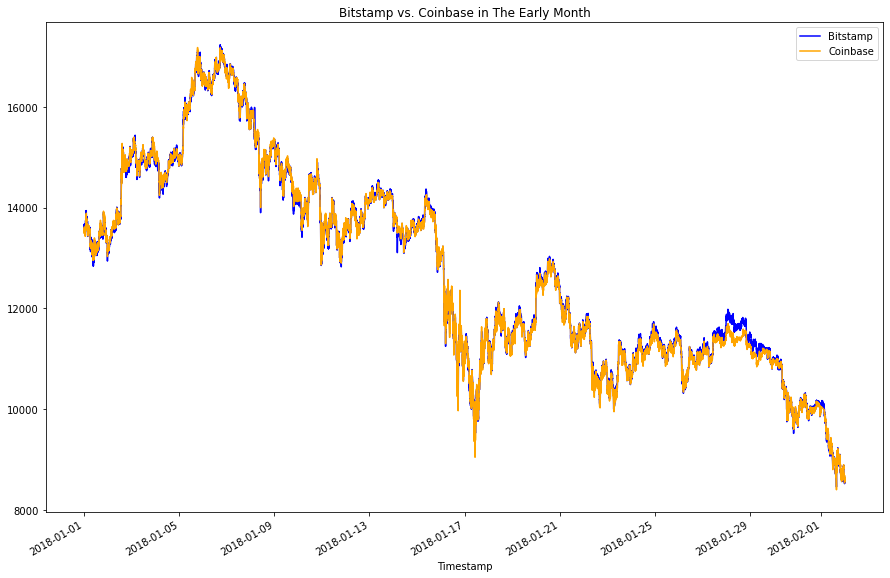

In [35]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

bitstamp['Close'].loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase in The Early Month", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")


<AxesSubplot:title={'center':'Bitstamp vs. Coinbase in The Later Month'}, xlabel='Timestamp'>

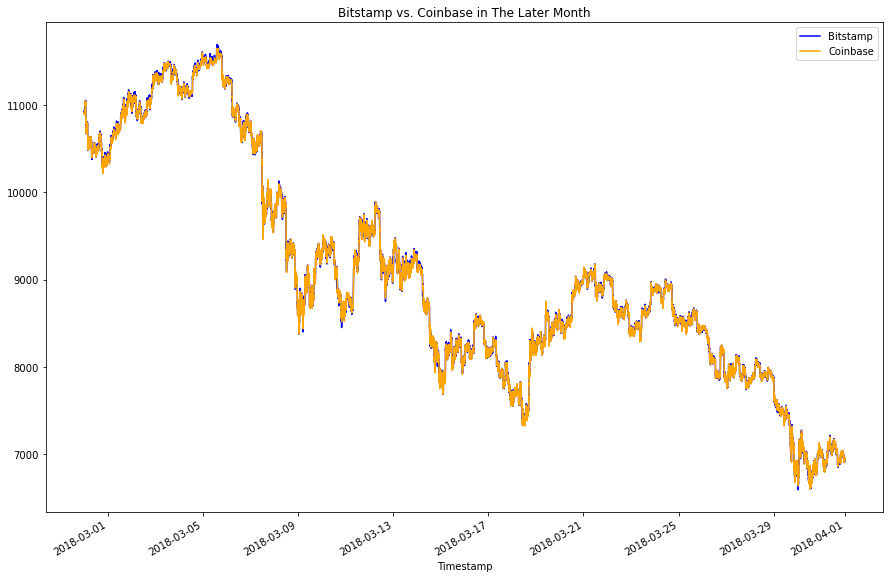

In [36]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE

bitstamp['Close'].loc['2018-02-28' : '2018-03-31'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase in The Later Month", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-02-28' : '2018-03-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, the degree of spread in the early month has more difference than that in the late month. It seems that the degree of spread narrows as time progressed.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase in the Early date'}, xlabel='Timestamp'>

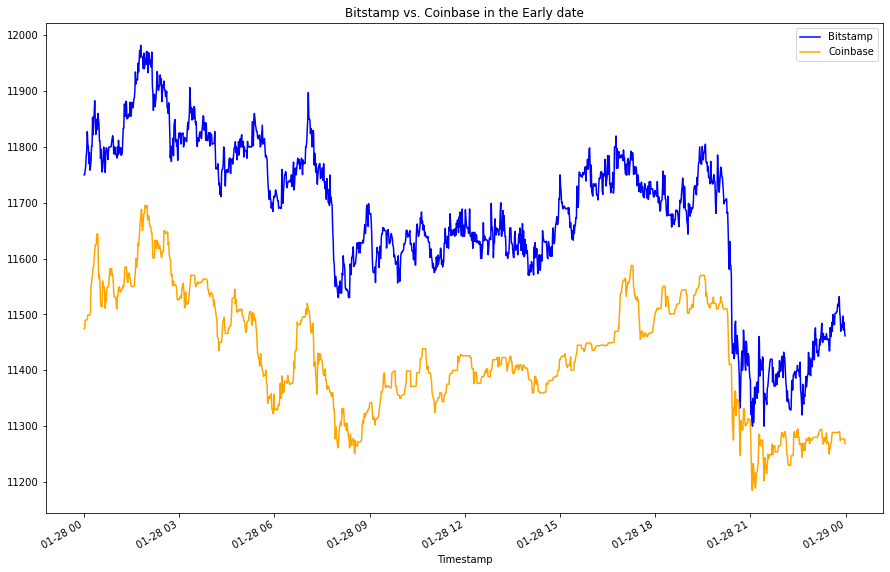

In [37]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

bitstamp['Close'].loc['2018-01-28'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase in the Early date", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-28'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [38]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# YOUR CODE HERE
arbitrage_spread_early = coinbase['Close'].loc['2018-01-28'] - bitstamp['Close'].loc['2018-01-28']

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()

count    1436.000000
mean     -247.552326
std        68.343472
min      -439.010000
25%      -290.925000
50%      -251.180000
75%      -210.022500
max       -55.030000
Name: Close, dtype: float64

<AxesSubplot:>

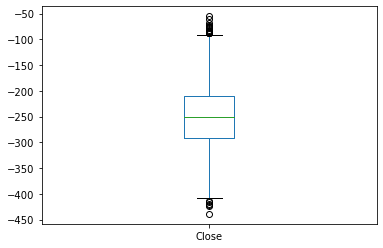

In [39]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind = "box")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase in The Middle Date'}, xlabel='Timestamp'>

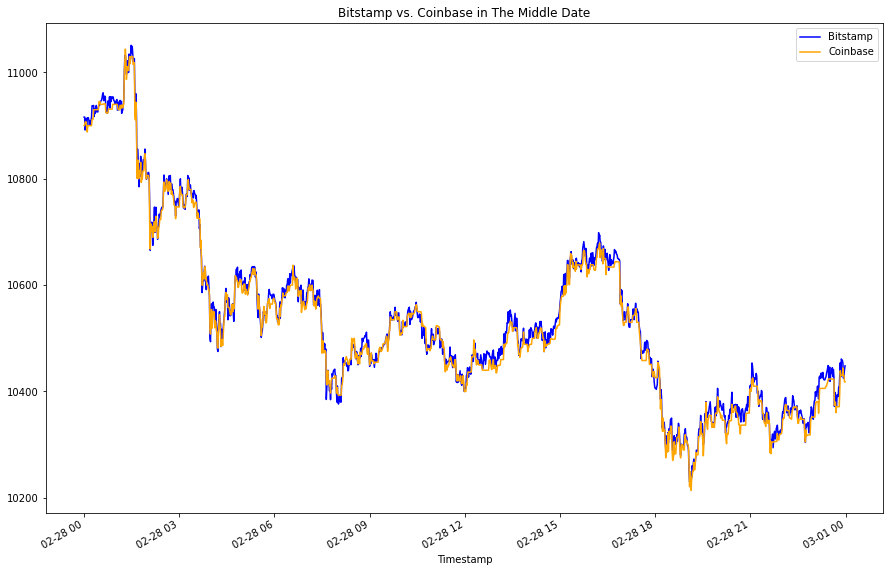

In [40]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

bitstamp['Close'].loc['2018-02-28'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase in The Middle Date", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-02-28'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [41]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# YOUR CODE HERE
arbitrage_spread_middle = coinbase['Close'].loc['2018-02-28'] - bitstamp['Close'].loc['2018-02-28']

# Generate summary statistics 
# YOUR CODE HERE
arbitrage_spread_middle.describe()

count    1430.000000
mean       -7.755825
std        11.296502
min       -46.000000
25%       -15.207500
50%        -7.815000
75%        -0.145000
max        35.000000
Name: Close, dtype: float64

<AxesSubplot:>

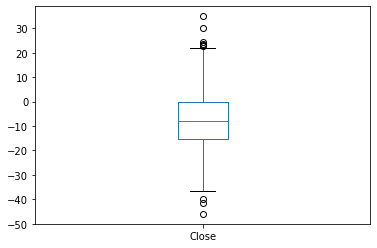

In [42]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_middle.plot(kind = "box")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase in The Late Date'}, xlabel='Timestamp'>

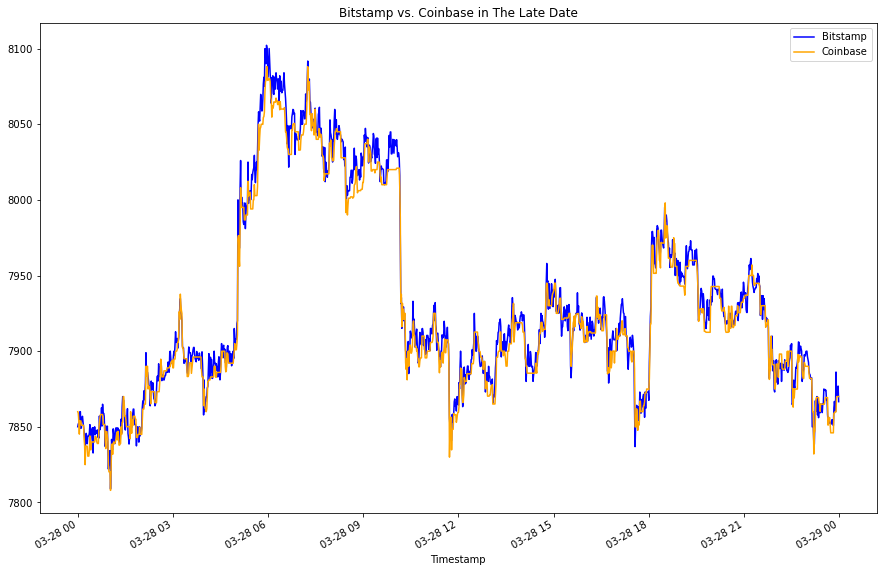

In [43]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

bitstamp['Close'].loc['2018-03-28'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase in The Late Date", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-28'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [44]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# YOUR CODE HERE
arbitrage_spread_late = coinbase['Close'].loc['2018-03-28'] - bitstamp['Close'].loc['2018-03-28']

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE
arbitrage_spread_late.describe()

count    1438.00000
mean       -4.42427
std         7.44509
min       -28.73000
25%        -8.99000
50%        -4.53500
75%         0.48000
max        26.30000
Name: Close, dtype: float64

<AxesSubplot:>

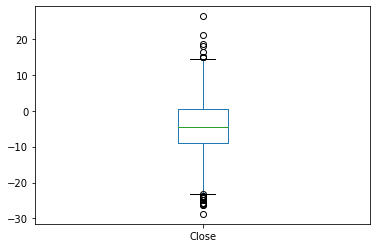

In [45]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_late.plot(kind = "box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [46]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
# YOUR CODE HERE

#Recall the line chart of price in the early date: 
#bitstamp's prices are more frequently higher than coinbase's
#So use bitstamp - coinbase
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']

#Recall the line chart of price in the middle date: 
#bitstamp's prices are more frequently higher than coinbase's
#So use bitstamp - coinbase
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-28'] - coinbase['Close'].loc['2018-02-28']

#Recall the line chart of price in the late date: 
#bitstamp's prices are more frequently higher than coinbase's
#So use bitstamp - coinbase
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-28'] - coinbase['Close'].loc['2018-03-28']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE

#Since needed to use a conditional statement, selete those arbitrages are profitable

#The summary stats for early date with a conditional statement is:
arbitrage_spread_early_profitable = arbitrage_spread_early[arbitrage_spread_early > 0]
arbitrage_spread_early_profitable.describe()


count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [47]:
#The summary stats for middle date with a conditional statement is:
arbitrage_spread_middle_profitable = arbitrage_spread_middle[arbitrage_spread_middle > 0]
arbitrage_spread_middle_profitable.describe()

count    1080.000000
mean       12.486259
std         8.128835
min         0.010000
25%         6.060000
50%        11.260000
75%        17.875000
max        46.000000
Name: Close, dtype: float64

In [48]:
#The summary stats for late date with a conditional statement is:
arbitrage_spread_late_profitable = arbitrage_spread_late[arbitrage_spread_late > 0]
arbitrage_spread_late_profitable.describe()

count    1028.000000
mean        7.853317
std         5.521699
min         0.010000
25%         3.710000
50%         6.880000
75%        10.712500
max        28.730000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [49]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
# YOUR CODE HERE

#Calculate the spread return for early date
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / coinbase['Close'].loc['2018-01-28']

#Calculate the spread return for middle date
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase['Close'].loc['2018-02-28']

#Calculate the spread return for late date                                                                                        
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / coinbase['Close'].loc['2018-03-28']


# Review the spread return DataFrame
# YOUR CODE HERE

#review the spread return of the early date
spread_return_early

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
                         ...   
2018-01-28 23:55:00    0.019518
2018-01-28 23:56:00    0.017302
2018-01-28 23:57:00    0.018510
2018-01-28 23:58:00    0.017303
2018-01-28 23:59:00    0.017094
Name: Close, Length: 1440, dtype: float64

In [50]:
#review the spread return of the middle date
spread_return_middle

Timestamp
2018-02-28 00:00:00    0.001482
2018-02-28 00:01:00    0.001317
2018-02-28 00:02:00         NaN
2018-02-28 00:03:00    0.000604
2018-02-28 00:04:00         NaN
                         ...   
2018-02-28 23:55:00    0.000832
2018-02-28 23:56:00         NaN
2018-02-28 23:57:00    0.000123
2018-02-28 23:58:00    0.002203
2018-02-28 23:59:00    0.002902
Name: Close, Length: 1439, dtype: float64

In [51]:
#review the spread return of the late date
spread_return_late

Timestamp
2018-03-28 00:00:00         NaN
2018-03-28 00:01:00         NaN
2018-03-28 00:02:00         NaN
2018-03-28 00:03:00    0.001122
2018-03-28 00:04:00    0.000778
                         ...   
2018-03-28 23:55:00    0.000205
2018-03-28 23:56:00    0.000203
2018-03-28 23:57:00    0.000103
2018-03-28 23:58:00    0.000883
2018-03-28 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [52]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
# YOUR CODE HERE

#The profitable trades in the early date are:
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_early.head()


Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [53]:
#The profitable trades in the middle date are:
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [54]:
#The profitable trades in the late date are:
profitable_trades_late = spread_return_late[spread_return_late > 0.01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [55]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

#the summary statistics for the profitable trades in the early date
profitable_trades_early.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

In [56]:
#the summary statistics for the profitable trades in the middle date
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [57]:
#the summary statistics for the profitable trades in the late date
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [58]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
# YOUR CODE HERE

# profits in the early date
profit_early = profitable_trades_early * coinbase['Close'].loc['2018-01-28']

# profits in the middle date
profit_middle = profitable_trades_middle * coinbase['Close'].loc['2018-02-28']

# profits in the late date
profit_late = profitable_trades_late * coinbase['Close'].loc['2018-03-28']



# Drop any missing values from the profit DataFrame
# YOUR CODE HERE

#Drop missing values for the early date
profit_per_trade_early = profit_early.dropna()

#Drop missing values for the middle date
profit_per_trade_middle = profit_middle.dropna()

#Drop missing values for the late date
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
# YOUR CODE HERE

#View early profit DataFrame
profit_per_trade_early


Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1378, dtype: float64

In [59]:
#View middle profit DataFrame
profit_per_trade_middle

Series([], Name: Close, dtype: float64)

In [60]:
#View late profit DataFrame
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [61]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

#The summary statistics for the early profit
profit_per_trade_early.describe()

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

In [62]:
#The summary statistics for the middle profit
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [63]:
#The summary statistics for the late profit
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Profits in The Early Date'}, xlabel='Timestamp'>

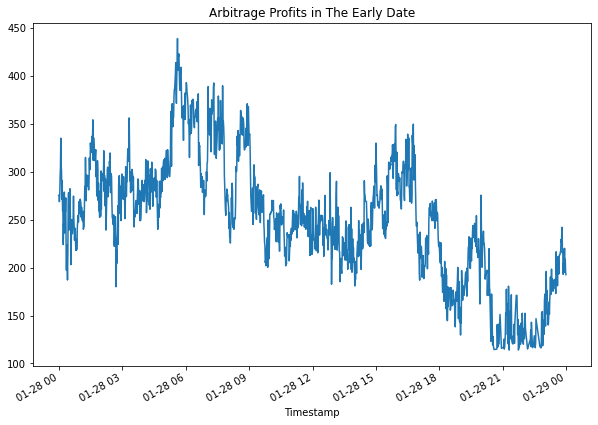

In [64]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(figsize=(10, 7), title="Arbitrage Profits in The Early Date")

<AxesSubplot:title={'center':'Arbitrage Profits in The Middle Date'}, xlabel='Timestamp'>

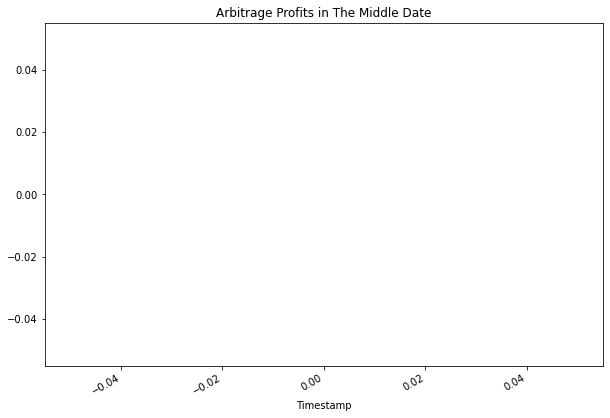

In [65]:
# Plot the results for the middle profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_middle.plot(figsize=(10, 7), title="Arbitrage Profits in The Middle Date")

<AxesSubplot:title={'center':'Arbitrage Profits in The Late Date'}, xlabel='Timestamp'>

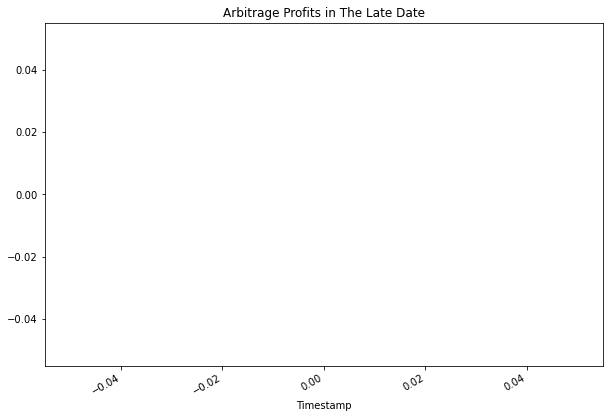

In [66]:
# Plot the results for the late profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_late.plot(figsize=(10, 7), title="Arbitrage Profits in The Late Date")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [67]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

#Calculate the sum profit in the early date
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early


349918.2900000001

In [68]:
#Calculate the sum profit in the middle date
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

0.0

In [69]:
#Calculate the sum profit in the late date
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [70]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early = profit_per_trade_early.cumsum()

cumulative_profit_middle = profit_per_trade_middle.cumsum()

cumulative_profit_late =profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Arbitrage Profits in The Early Date'}, xlabel='Timestamp'>

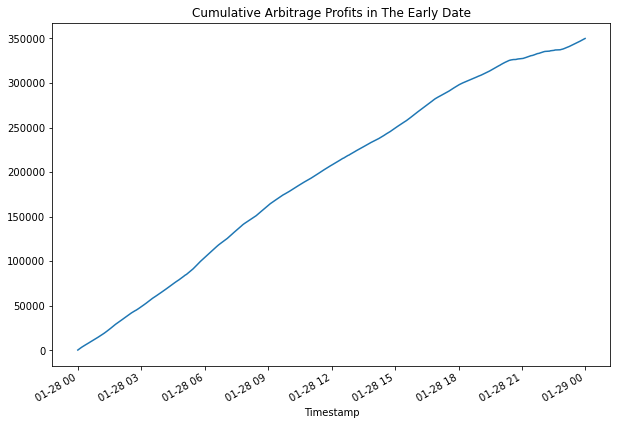

In [71]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Arbitrage Profits in The Early Date")

<AxesSubplot:title={'center':'Cumulative Arbitrage Profits in The Middle Date'}, xlabel='Timestamp'>

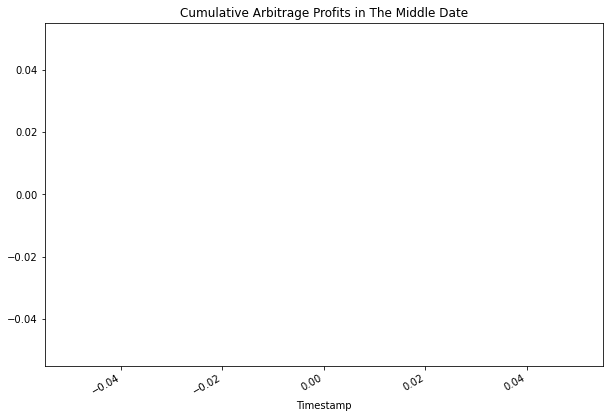

In [72]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame

cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Arbitrage Profits in The Middle Date")

<AxesSubplot:title={'center':'Cumulative Arbitrage Profits in The Late Date'}, xlabel='Timestamp'>

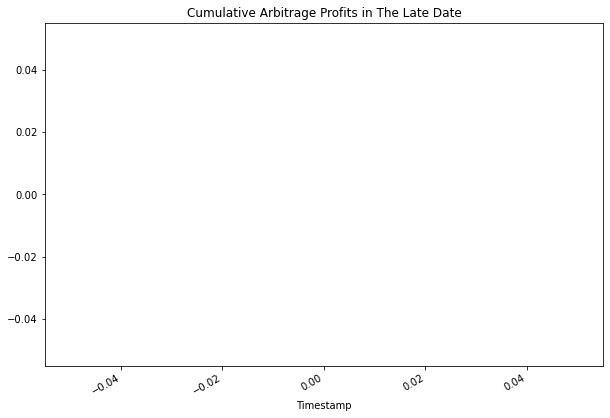

In [73]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame

cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Arbitrage Profits in The Late Date")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Yes, from my analysis, it seems that more profitable arbitrage opportunities happen in the early date of the first quarter in 2018; particularly, in the Jan., there might be more profitable arbitrage opportunities. That might caused by the calender effect. Also, this finding reinforce my answer for the previous question that "More differences happen in the early date"